In [1]:
%pwd

'/Users/xiaoyuzhao/Downloads/5_Combinatorial_CROP_seq/CROP_Python'

# How to run DESeq2 in python
## (A python package using rpy2 to port DESeq2 into python)
https://github.com/wckdouglas/diffexpr

#### INSTALL
**Dependencies are pandas (python), rpy2 (python), and DESeq2 (R) Best way to build dependencies should be via conda.**

conda config --add channels defaults**

conda config --add channels bioconda**

conda config --add channels conda-forge**

conda create -q -n diffexpr python=3.6 pandas tzlocal rpy2 biopython ReportLab pytest-cov bioconductor-deseq2 codecov
  
conda activate diffexpr # activate diffexpr environment**

Rscript setup.R #to install DESeq2 correctly 

python setup.py install

In [2]:
from pandas.core.index import Index as PandasIndex
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2
%matplotlib inline

from perturbseq import *
from diffexpr import *

/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
#Figure style
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# I. Load Perturbseq data from hdf5

Populations are constructed in notebook *GI generate populations*

In [4]:
pop1 = CellPopulation.from_hdf('./sequencing/outs_S1/final_pop_with_normalized_S1.hdf')
pop2 = CellPopulation.from_hdf('./sequencing/outs_S2/final_pop_with_normalized_S2.hdf')
pop3 = CellPopulation.from_hdf('./sequencing/outs_S3/final_pop_with_normalized_S3.hdf')
pop4 = CellPopulation.from_hdf('./sequencing/outs_S4/final_pop_with_normalized_S4.hdf')

Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 3.3512349128723145s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 4.390713214874268s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 3.7921462059020996s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 4.291559934616089s.
Done.


In [5]:
mean_pop1 = CellPopulation.from_hdf('./sequencing/outs_S1/mean_pop_with_normalized_S1.hdf')
mean_pop2 = CellPopulation.from_hdf('./sequencing/outs_S2/mean_pop_with_normalized_S2.hdf')
mean_pop3 = CellPopulation.from_hdf('./sequencing/outs_S3/mean_pop_with_normalized_S3.hdf')
mean_pop4 = CellPopulation.from_hdf('./sequencing/outs_S4/mean_pop_with_normalized_S4.hdf')

Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.18447279930114746s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.1745312213897705s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.18501687049865723s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.17682719230651855s.
Done.


# II. Determine LFCs of all SKOs and DKOs versus control using Deseq2

In [6]:
a = mean_pop3.cells.query("knock_outs == 'SKO'")
a.sort_values("fitness", ascending = False)

,num_cells,UMI_mean,num_targets,fitness1,fitness2,fitness,knock_outs,first_target,second_target,perturbed,DESeq2_de
SMAD4-CTRL1,1191,16387.3325,1,0.2610,0.2710,0.2660,SKO,SMAD4,CTRL1,SMAD4-CTRL1,410.0000
PTEN-CTRL1,201,14296.0249,1,0.1617,0.1527,0.1572,SKO,PTEN,CTRL1,PTEN-CTRL1,0.0000
CDH1-CTRL1,85,12537.3176,1,0.1485,0.0933,0.1209,SKO,CDH1,CTRL1,CDH1-CTRL1,0.0000
TP53-CTRL1,224,12251.8080,1,0.0489,0.0734,0.0612,SKO,TP53,CTRL1,TP53-CTRL1,0.0000
CASP8-CTRL1,120,12851.2583,1,0.0643,-0.0011,0.0316,SKO,CASP8,CTRL1,CASP8-CTRL1,0.0000
NF2-CTRL1,226,11469.5929,1,-0.0697,0.0496,-0.0101,SKO,NF2,CTRL1,NF2-CTRL1,140.0000
RB1-CTRL1,125,12430.8720,1,-0.0904,-0.0780,-0.0842,SKO,RB1,CTRL1,RB1-CTRL1,0.0000
NF1-CTRL1,134,13289.6045,1,-0.0907,-0.1232,-0.1069,SKO,NF1,CTRL1,NF1-CTRL1,0.0000
TBX3-CTRL1,48,12982.2292,1,-0.2265,-0.0409,-0.1337,SKO,TBX3,CTRL1,TBX3-CTRL1,0.0000
CBFB-CTRL1,98,10477.6429,1,-0.1606,-0.1177,-0.1391,SKO,CBFB,CTRL1,CBFB-CTRL1,12.0000


## II_a. Select DKOs we are interested in CROPseq experiment

**We are only interested in these DKOs:**

1. Cell number of DKO itself >= 20;

2. Cell number of its corresponding SKOs >= 20

**Based on these thresholds, we got a DKOs_list containing 49 different DKOs.**

**Log fold change (LFC) of these DKOs and their SKOs will be determined by Deseq2.**


**------------------------------Sample 1: S1_D0_full (Cells in full medium at Day0)-----------------------------------**

In [7]:
#All perturbations in S1. Deseq2 will be applied on all of them.
all_genes_S1 = mean_pop1.cells.index.values
all_genes_S1 = np.setdiff1d(all_genes_S1, 'CTRL-CTRL')
print("Sample 1:\nS1_D0_full...")
print("Total perturbations: {}".format(len(all_genes_S1)))

#Select DKOs with cell number >=20, and its coresponding SKOs have >=20 cells.
#Transcription interactions will be explored on them
gene_list_S1 = mean_pop1.cells.query('num_cells >= 20').index.values
gene_list_S1 = np.setdiff1d(gene_list_S1, 'CTRL-CTRL')
print("{} of {} perturbations have more than 20 cells".format(len(gene_list_S1),len(all_genes_S1)))

doubles = list()
for idx, row in mean_pop1.cells.query('knock_outs == "DKO"'and 'num_cells >= 20').iterrows():
    first = row['first_target'] + '-CTRL1'
    second = row['second_target'] + '-CTRL1'
    if (first in gene_list_S1) and (second in gene_list_S1):
        doubles.append((first, second, idx))
DKOs_S1 = [double for first, second, double in doubles]
doubles_S1 = [(first, second, double) for first, second, double in doubles]
print('Transcription interactions will not be explored on sample S1')              

Sample 1:
S1_D0_full...
Total perturbations: 66
61 of 66 perturbations have more than 20 cells
Transcription interactions will not be explored on sample S1


**------------------------------Sample 2: S2_D6_full (Cells in full medium at Day6)-----------------------------------**

In [8]:
#All perturbations in S2. Deseq2 will be applied on all of them.
all_genes_S2 = mean_pop2.cells.index.values
all_genes_S2 = np.setdiff1d(all_genes_S2, ['CTRL-CTRL'])
print("Sample 2:\nS2_D6_full...")
print("Total perturbations: {}".format(len(all_genes_S2)))

#Select DKOs with cell number >=20, and its coresponding SKOs have >=20 cells.
#Transcription interactions will be explored on them
gene_list_S2 = mean_pop2.cells.query('num_cells >= 20').index.values
gene_list_S2 = np.setdiff1d(gene_list_S2, 'CTRL-CTRL')
print("{} of {} perturbations have more than 20 cells".format(len(gene_list_S2),len(all_genes_S2)))

doubles = list()
for idx, row in mean_pop2.cells.query('knock_outs == "DKO"'and 'num_cells >= 20').iterrows():
    first = row['first_target'] + '-CTRL1'
    second = row['second_target'] + '-CTRL1'
    if (first in gene_list_S2 and second in gene_list_S2):
        doubles.append((first, second, idx))
DKOs_S2 = [double for first, second, double in doubles]
doubles_S2 = [(first, second, double) for first, second, double in doubles]
print("Transcription interactions will be explored on {} of DKOs".format(len(DKOs_S2)))

Sample 2:
S2_D6_full...
Total perturbations: 66
54 of 66 perturbations have more than 20 cells
Transcription interactions will be explored on 43 of DKOs


**------------------------------Sample 3: S3_D6_tgf (Cells in TGfbeta1 medium at Day6)-----------------------------------**

In [9]:
#All perturbations in S3. Deseq2 will be applied on all of them.
all_genes_S3 = mean_pop3.cells.index.values
all_genes_S3 = np.setdiff1d(all_genes_S3, 'CTRL-CTRL')
print("Sample 3:\nS3_D6_tgf...")
print("Total perturbations: {}".format(len(all_genes_S3)))

#Select DKOs with cell number >=20, and its coresponding SKOs have >=20 cells.
#Transcription interactions will be explored on them
gene_list_S3 = mean_pop3.cells.query('num_cells >= 20').index.values
gene_list_S3 = np.setdiff1d(gene_list_S3, 'CTRL-CTRL')
print("{} of {} perturbations have more than 20 cells".format(len(gene_list_S3),len(all_genes_S3)))

doubles = list()
for idx, row in mean_pop3.cells.query('knock_outs == "DKO"'and 'num_cells >= 20').iterrows():
    first = row['first_target'] + '-CTRL1'
    second = row['second_target'] + '-CTRL1'
    if (first in gene_list_S3 and second in gene_list_S3):
        doubles.append((first, second, idx))
DKOs_S3 = [double for first, second, double in doubles]
doubles_S3 = [(first, second, double) for first, second, double in doubles]
print("Transcription interactions will be explored on {} of DKOs".format(len(DKOs_S3)))

Sample 3:
S3_D6_tgf...
Total perturbations: 65
44 of 65 perturbations have more than 20 cells
Transcription interactions will be explored on 33 of DKOs


**------------------------------Sample 4: S4_D6_min (Cells in minimal medium at Day6)-----------------------------------**

In [10]:
#All perturbations in S4. Deseq2 will be applied on all of them.
all_genes_S4 = mean_pop4.cells.index.values
all_genes_S4 = np.setdiff1d(all_genes_S4, 'CTRL-CTRL')
print("Sample 4:\nS4_D6_min...")
print("Total perturbations: {}".format(len(all_genes_S4)))

#Select DKOs with cell number >=20, and its coresponding SKOs have >=20 cells.
#Transcription interactions will be explored on them
gene_list_S4 = mean_pop4.cells.query('num_cells >= 20').index.values
gene_list_S4 = np.setdiff1d(gene_list_S4, 'CTRL-CTRL')
print("{} of {} perturbations have more than 20 cells".format(len(gene_list_S4),len(all_genes_S4)))

doubles = list()
for idx, row in mean_pop4.cells.query('knock_outs == "DKO"'and 'num_cells >= 20').iterrows():
    first = row['first_target'] + '-CTRL1'
    second = row['second_target'] + '-CTRL1'
    if (first in gene_list_S4 and second in gene_list_S4):
        doubles.append((first, second, idx))
DKOs_S4 = [double for first, second, double in doubles]
doubles_S4 = [(first, second, double) for first, second, double in doubles]
print("Transcription interactions will be explored on {} of DKOs".format(len(DKOs_S4)))

Sample 4:
S4_D6_min...
Total perturbations: 67
60 of 67 perturbations have more than 20 cells
Transcription interactions will be explored on 49 of DKOs


In [11]:
#Example
print(DKOs_S4)

['CASP8-CDH1', 'CASP8-NF1', 'CASP8-NF2', 'CASP8-PTEN', 'CASP8-RB1', 'CASP8-SMAD4', 'CASP8-TBX3', 'CASP8-TP53', 'CBFB-CDH1', 'CBFB-NF1', 'CBFB-NF2', 'CBFB-PTEN', 'CBFB-RB1', 'CBFB-SMAD4', 'CBFB-TBX3', 'CBFB-TP53', 'CBFB-USP9X', 'CDH1-NF1', 'CDH1-NF2', 'CDH1-PTEN', 'CDH1-RB1', 'CDH1-SMAD4', 'CDH1-TBX3', 'CDH1-TP53', 'NF1-NF2', 'NF1-PTEN', 'NF1-RB1', 'NF1-SMAD4', 'NF1-TBX3', 'NF1-TP53', 'NF2-PTEN', 'NF2-RB1', 'NF2-SMAD4', 'NF2-TBX3', 'NF2-TP53', 'NF2-USP9X', 'PTEN-RB1', 'PTEN-SMAD4', 'PTEN-TBX3', 'PTEN-TP53', 'PTEN-USP9X', 'RB1-SMAD4', 'RB1-TBX3', 'RB1-TP53', 'SMAD4-TBX3', 'SMAD4-TP53', 'SMAD4-USP9X', 'TBX3-TP53', 'TP53-USP9X']


In [12]:
#Example
doubles_S4[1:5]

[('CASP8-CTRL1', 'NF1-CTRL1', 'CASP8-NF1'),
 ('CASP8-CTRL1', 'NF2-CTRL1', 'CASP8-NF2'),
 ('CASP8-CTRL1', 'PTEN-CTRL1', 'CASP8-PTEN'),
 ('CASP8-CTRL1', 'RB1-CTRL1', 'CASP8-RB1')]

## II_b. Calculate GI scores using "Max model"

**Since only 1 or 2 sgRNA were using for each gene in CROPseq, GI scores here are calculated based on sgRNA-level fitness. The scores could be slightly different from those at gene level in our combinatorial CRISPR screens.**

   **N.B.:**
   
   **1. sgRNA-level GI scores are calculated based on fitness.**
     
     fitness1: fitness of replicate1 (sgRNA level)

     fitness2: fitness of replicate2 (sgRNA level)

     fitness: average of fitness1 and fitness2 (sgRNA level)
     
   **2. Gene-level GI scores from combinatorial CRISPR screens are also loaded.**

     GI scores of two replicates in combinatorial CRISPR screens are both added here.

In [13]:
def calculation_GI(mean_info, doubles_list):
    gi_score = dict()
    for first, second, double in doubles_list:
        gi_score[double] = mean_info.loc[double,'fitness'] - np.maximum(mean_info.loc[first,'fitness'], mean_info.loc[second, 'fitness'])
    
    return gi_score


**------------------------------Sample 2: S2_D6_full (Cells in full medium at Day6)-----------------------------------**

In [14]:
#Calculate GI_score based on fitness at sgRNA level
#Add GI_score to mean_pop.cells of DKOs
mean_info_S2 = mean_pop2.cells[['perturbed','num_cells','num_targets', 'fitness1', 'fitness2', 'fitness']]
gi_score_S2 = calculation_GI(mean_info_S2, doubles_S2)
DKOs_info_S2 = mean_pop2.cells[['perturbed','num_cells','num_targets', 'fitness1', 'fitness2', 'fitness']].loc[DKOs_S2]
DKOs_info_S2['GI_score'] = DKOs_info_S2.index.map(gi_score_S2)

#Load gene-level GI_score calculated from combinatorial CRISPR screens
gi_1 = pd.read_csv('./sequencing/outs_S2/outs/full.1.GI.gene_level_rownames_alphabetically ordered_20200224.csv', index_col=0)
gi_2 = pd.read_csv('./sequencing/outs_S2/outs/full.2.GI.gene_level_rownames_alphabetically ordered_20200224.csv', index_col=0)
temp_S2 = pd.merge(DKOs_info_S2, gi_1[['Rep1_Max.mean', 'Rep1_p.adj_Max']], left_index = True, right_index = True, how = 'left')
temp2_S2 = pd.merge(temp_S2, gi_2[['Rep2_Max.mean', 'Rep2_p.adj_Max']], left_index = True, right_index = True, how = 'left')

#Load weighted gene-level GI_score calculated from combinatorial CRISPR screens
gi_S2 = pd.read_csv('./sequencing/outs_S2/outs/Final_full_f.avg_GI_20200224.csv', index_col=0)
DKOs_final_S2 = pd.merge(temp2_S2, gi_S2[['gi.Weighted.Avg.Max', 'fisher.p.Max.adj']], left_index = True, right_index = True, how = 'left')
DKOs_final_S2.sort_values('GI_score', ascending = False).head() 


,perturbed,num_cells,num_targets,fitness1,fitness2,fitness,GI_score,Rep1_Max.mean,Rep1_p.adj_Max,Rep2_Max.mean,Rep2_p.adj_Max,gi.Weighted.Avg.Max,fisher.p.Max.adj
NF2-TBX3,NF2-TBX3,74,2,0.1025,0.0688,0.0857,0.0545,-0.0119,1.0000,-0.0096,1.0000,-0.0106,1.0000
PTEN-RB1,PTEN-RB1,49,2,0.1413,0.1156,0.1284,0.0519,0.0186,0.0000,0.0157,0.0000,0.0169,0.0000
PTEN-TBX3,PTEN-TBX3,29,2,0.1154,0.1362,0.1258,0.0493,0.0103,0.0569,0.0011,1.0000,0.0069,0.1063
PTEN-TP53,PTEN-TP53,70,2,0.1243,0.1139,0.1191,0.0426,0.0391,0.0000,0.0368,0.0000,0.0378,0.0000
SMAD4-TP53,SMAD4-TP53,240,2,0.0641,0.0812,0.0726,0.0403,-0.0018,1.0000,0.0016,1.0000,-0.0001,1.0000


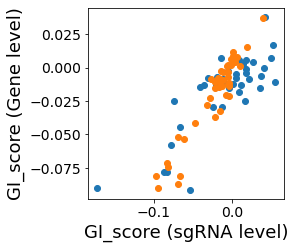

In [15]:
plt.figure(figsize=(3.5,3.5))
plt.scatter('GI_score', 'gi.Weighted.Avg.Max', data = DKOs_final_S2)
plt.scatter('Rep1_Max.mean', 'Rep2_Max.mean', data = DKOs_final_S2)
plt.xlabel('GI_score (sgRNA level)')
plt.ylabel('GI_score (Gene level)')
plt.show()

**------------------------------Sample 3: S3_D6_tgf (Cells in TGfbeta1 medium at Day6)-----------------------------------**

In [16]:
#Calculate GI_score based on fitness at sgRNA level
#Add GI_score to mean_pop.cells of DKOs
mean_info_S3 = mean_pop3.cells[['perturbed','num_cells','num_targets', 'fitness1', 'fitness2', 'fitness']]
gi_score_S3 = calculation_GI(mean_info_S3, doubles_S3)
DKOs_info_S3 = mean_pop3.cells[['perturbed','num_cells','num_targets', 'fitness1', 'fitness2', 'fitness']].loc[DKOs_S3]
DKOs_info_S3['GI_score'] = DKOs_info_S3.index.map(gi_score_S3)

#Load gene-level GI_score calculated from combinatorial CRISPR screens
gi_1 = pd.read_csv('./sequencing/outs_S3/outs/tgf.1.GI.gene_level_rownames_alphabetically ordered_20200224.csv', index_col=0)
gi_2 = pd.read_csv('./sequencing/outs_S3/outs/tgf.2.GI.gene_level_rownames_alphabetically ordered_20200224.csv', index_col=0)
temp_S3 = pd.merge(DKOs_info_S3, gi_1[['Rep1_Max.mean', 'Rep1_p.adj_Max']], left_index = True, right_index = True, how = 'left')
temp2_S3 = pd.merge(temp_S3, gi_2[['Rep2_Max.mean', 'Rep2_p.adj_Max']], left_index = True, right_index = True, how = 'left')

#Load weighted gene-level GI_score calculated from combinatorial CRISPR screens
gi_S3 = pd.read_csv('./sequencing/outs_S3/outs/Final_tgf_f.avg_GI_20200224.csv', index_col=0)
DKOs_final_S3 = pd.merge(temp2_S3, gi_S3[['gi.Weighted.Avg.Max', 'fisher.p.Max.adj']], left_index = True, right_index = True, how = 'left')
DKOs_final_S3.sort_values('GI_score', ascending = False).head() 

,perturbed,num_cells,num_targets,fitness1,fitness2,fitness,GI_score,Rep1_Max.mean,Rep1_p.adj_Max,Rep2_Max.mean,Rep2_p.adj_Max,gi.Weighted.Avg.Max,fisher.p.Max.adj
CBFB-NF2,CBFB-NF2,43,2,0.1675,0.1167,0.1421,0.1522,0.0329,1.0000,-0.0354,1,-0.0077,1.0000
CASP8-RB1,CASP8-RB1,24,2,0.1680,0.0833,0.1256,0.0940,-0.0072,1.0000,-0.0338,1,-0.0269,1.0000
PTEN-SMAD4,PTEN-SMAD4,161,2,0.3478,0.3318,0.3398,0.0738,0.0251,1.0000,0.0150,1,0.0190,1.0000
NF2-TBX3,NF2-TBX3,87,2,-0.0211,0.0384,0.0087,0.0187,0.0194,0.0027,-0.0166,1,0.0031,0.0353
RB1-SMAD4,RB1-SMAD4,254,2,0.2959,0.2729,0.2844,0.0184,-0.0304,1.0000,-0.0606,1,-0.0494,1.0000


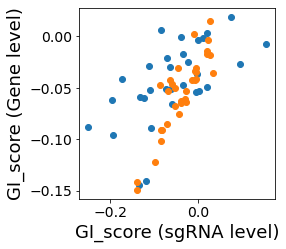

In [17]:
plt.figure(figsize=(3.5,3.5))
plt.scatter('GI_score', 'gi.Weighted.Avg.Max', data = DKOs_final_S3)
plt.scatter('Rep1_Max.mean', 'Rep2_Max.mean', data = DKOs_final_S3)
plt.xlabel('GI_score (sgRNA level)')
plt.ylabel('GI_score (Gene level)')
plt.show()

**------------------------------Sample 4: S4_D6_min (Cells in minimal medium at Day6)-----------------------------------**

In [18]:
#Calculate GI_score based on fitness at sgRNA level
#Add GI_score to mean_pop.cells of DKOs
mean_info_S4 = mean_pop4.cells[['perturbed','num_cells','num_targets', 'fitness1', 'fitness2', 'fitness']]
gi_score_S4 = calculation_GI(mean_info_S4, doubles_S4)
DKOs_info_S4 = mean_pop4.cells[['perturbed','num_cells','num_targets', 'fitness1', 'fitness2', 'fitness']].loc[DKOs_S4]
DKOs_info_S4['GI_score'] = DKOs_info_S4.index.map(gi_score_S4)

#Load gene-level GI_score calculated from combinatorial CRISPR screens
gi_1 = pd.read_csv('./sequencing/outs_S4/outs/1p1.GI.gene_level_rownames_alphabetically ordered_20200224.csv', index_col=0)
gi_2 = pd.read_csv('./sequencing/outs_S4/outs/1p2.GI.gene_level_rownames_alphabetically ordered_20200224.csv', index_col=0)
temp_S4 = pd.merge(DKOs_info_S4, gi_1[['Rep1_Max.mean', 'Rep1_p.adj_Max']], left_index = True, right_index = True, how = 'left')
temp2_S4 = pd.merge(temp_S4, gi_2[['Rep2_Max.mean', 'Rep2_p.adj_Max']], left_index = True, right_index = True, how = 'left')

#Load weighted gene-level GI_score calculated from combinatorial CRISPR screens
gi_S4 = pd.read_csv('./sequencing/outs_S4/outs/Final_1p_f.avg_GI_20200224.csv', index_col=0)
DKOs_final_S4 = pd.merge(temp2_S4, gi_S4[['gi.Weighted.Avg.Max', 'fisher.p.Max.adj']], left_index = True, right_index = True, how = 'left')
DKOs_final_S4.sort_values('GI_score', ascending = False).head() 

,perturbed,num_cells,num_targets,fitness1,fitness2,fitness,GI_score,Rep1_Max.mean,Rep1_p.adj_Max,Rep2_Max.mean,Rep2_p.adj_Max,gi.Weighted.Avg.Max,fisher.p.Max.adj
NF2-PTEN,NF2-PTEN,65,2,0.3752,0.3873,0.3813,0.1764,0.0810,0.0000,0.0925,0.0000,0.0862,0.0000
PTEN-TP53,PTEN-TP53,148,2,0.2648,0.2565,0.2607,0.0804,0.0782,0.0000,0.0717,0.0000,0.0747,0.0000
NF2-TP53,NF2-TP53,271,2,0.2675,0.2800,0.2738,0.0690,0.0458,0.0000,0.0551,0.0000,0.0501,0.0000
NF2-TBX3,NF2-TBX3,82,2,0.3000,0.2437,0.2718,0.0670,-0.0010,1.0000,0.0001,1.0000,-0.0004,1.0000
CBFB-TBX3,CBFB-TBX3,20,2,0.1039,0.0302,0.0671,0.0511,-0.0015,1.0000,-0.0123,1.0000,-0.0069,1.0000


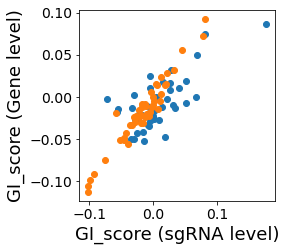

In [19]:
plt.figure(figsize=(3.5,3.5))
plt.scatter('GI_score', 'gi.Weighted.Avg.Max', data = DKOs_final_S4)
plt.scatter('Rep1_Max.mean', 'Rep2_Max.mean', data = DKOs_final_S4)
plt.xlabel('GI_score (sgRNA level)')
plt.ylabel('GI_score (Gene level)')
plt.show()

## II_c. Running DESeq2 for all DKOs and SKOs with cell number >= 20

**Top ~5000 highly expressed genes will be selected for DESeq2.**

**---------------------------------------------DESeq2 function------------------------------------------------**

In [20]:
from diffexpr.py_deseq import py_DESeq2
def deseq_vs_control(perturbed, pop, balance_representation = False, cell_num = 50):
    #e.g. perturbed = 'NF2-TP53' ---->  perturb =  'perturbed == "NF2-TP53"'
    perturb = ('perturbed == ' + "\"" + perturbed + "\"")
    df = pop.where(cells = perturb).T
    
    control = ('perturbed == "CTRL-CTRL"')
    control_df = pop.where(cells = control).T
    
    if balance_representation:
        df = df.sample(n=cell_num, axis= 1, replace=True, random_state=100)
        control_df = control_df.sample(n=cell_num, axis= 1, replace = True, random_state = 100)
        data = df.join(control_df)

    else:
        data = df.join(control_df)
    
    data.reset_index(inplace = True)
    data.columns = data.columns.map(lambda x: x.replace('-', '_'))
    sample1 = perturbed.replace('-', '_')
    
    coldata = pd.DataFrame({'samples' : ['B_' + sample1] * df.shape[1] + ['A_' + 'control']*control_df.shape[1] }, index = data.columns[1:])
    coldata['cell_barcode'] = coldata.index.values
    coldata.index = coldata['cell_barcode']
   
    #Generate Deseq2 object
    dds = py_DESeq2(count_matrix = data,
               design_matrix = coldata,
               design_formula = '~ samples',
               gene_column = 'gene_id') # <- telling DESeq2 this should be the gene ID column
    
    
    dds.run_deseq() 
    dds.get_deseq_result(contrast = ['samples', 'B_' + sample1, 'A_' + 'control'])
    res = dds.deseq_result 
    lfc_res = dds.lfcShrink(coef = 2, method='apeglm')
    lfc_res.set_index('gene_id', inplace = True)
    
    #Results of Deseq2
    out = dict()
    out['name'] = perturbed
    out['baseMean'] = pd.Series(lfc_res['baseMean'], index=lfc_res.index, name=perturbed)
    out['LFC'] = pd.Series(lfc_res['log2FoldChange'], index=lfc_res.index, name=perturbed)
    out['lfcSE'] = pd.Series(lfc_res['lfcSE'], index=lfc_res.index, name=perturbed)
    out['pvalue'] = pd.Series(lfc_res['pvalue'], index=lfc_res.index, name=perturbed)
    out['padj'] = pd.Series(lfc_res['padj'], index=lfc_res.index, name=perturbed)

    #Normalized counts from Deseq2
    res = dict()
    res['name'] = perturbed
    cell_ids = df.columns.map(lambda x: x.replace('-', '_'))
    cell_ids_control = control_df.columns.map(lambda x: x.replace('-', '_'))
    res['normalized_count'] = dds.normalized_count()[cell_ids]
    res['normalized_count_control'] = dds.normalized_count()[cell_ids_control]
    return (out, res)
    

**-------------------------------------------------Running DESeq2 ------------------------------------------------**

**Outputs of DESeq2 will be saved afterwards**

    1. DESeq2 result of each perturbation, including baseMean, LFC, lfcSE, pvalue, padj will be saved into different individual csv files.
    
    2. No. of DEGs(padj <= 0.05) of each perturbation will be counted, and saved into mean_pop.cells['DESeq2_de'].
    
    3. LFCs of all perturbations will be saved into a single file. It will be used for measuring transcriptomic        interactions.
    
    4. Normalized count of each perturbation will be concated and saved into pop.normalized_matrix. It will be used in random forest training.
    
    

In [21]:
from joblib import Parallel, delayed

**------------------------------Sample 1: S1_D0_full (Cells in full medium at Day0)-----------------------------------**

In [22]:
print("Sample 1:\nS1_D0_full...")
print("Runing DESeq2 on {} of genes".format(len(mean_pop1.genes.query('mean > 0.1'))))
pop_S1 = pop1.subpopulation(genes = 'mean > 0.1')
Res_deseq_S1= Parallel(n_jobs=24, verbose=10)(delayed(deseq_vs_control)(perturbed, pop = pop_S1, balance_representation = False) for perturbed in all_genes_S1)


Sample 1:
S1_D0_full...
Runing DESeq2 on 7412 of genes
Generating summary statistics...
Done.


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:  3.5min
[Parallel(n_jobs=24)]: Done  13 tasks      | elapsed:  4.6min
[Parallel(n_jobs=24)]: Done  26 out of  66 | elapsed: 15.6min remaining: 24.1min
[Parallel(n_jobs=24)]: Done  33 out of  66 | elapsed: 17.8min remaining: 17.8min
[Parallel(n_jobs=24)]: Done  40 out of  66 | elapsed: 20.4min remaining: 13.3min
[Parallel(n_jobs=24)]: Done  47 out of  66 | elapsed: 24.2min remaining:  9.8min
[Parallel(n_jobs=24)]: Done  54 out of  66 | elapsed: 25.9min remaining:  5.8min
[Parallel(n_jobs=24)]: Done  61 out of  66 | elapsed: 27.0min remaining:  2.2min
[Parallel(n_jobs=24)]: Done  66 out of  66 | elapsed: 27.9min finished


In [23]:
print("2. Saving all LFCs to a single csv file\n")
lfc_S1 = pd.DataFrame([res['LFC'] for res, _ in Res_deseq_S1]).T
#lfc_S1.insert(loc = 1, column = 'gene_name', value = pop1.gene_names(lfc_S1['gene_id'])
lfc_S1

2. Saving all LFCs to a single csv file



,CASP8-CDH1,CASP8-CTRL1,CASP8-NF1,CASP8-NF2,CASP8-PTEN,CASP8-RB1,CASP8-SMAD4,CASP8-TBX3,CASP8-TP53,CASP8-USP9X,...,SMAD4-CTRL1,SMAD4-TBX3,SMAD4-TP53,SMAD4-USP9X,TBX3-CTRL1,TBX3-TP53,TBX3-USP9X,TP53-CTRL1,TP53-USP9X,USP9X-CTRL1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000188976,-0.0007,0.0031,0.0000,-0.0042,0.0004,-0.0100,-0.0036,-0.0044,-0.0008,-0.0000,...,0.0464,0.0290,0.0500,-0.0033,-0.0001,-0.0017,0.0002,-0.0121,-0.0051,-0.0000
ENSG00000187608,-0.0046,-0.0085,-0.0000,-0.0089,-0.0007,-0.0038,-0.0297,-0.0060,-0.0018,0.0000,...,-0.1076,-0.0176,-0.0304,-0.0078,-0.0003,-0.0016,-0.0010,-0.0284,-0.0002,0.0000
ENSG00000188157,0.0073,0.0161,0.0000,0.0048,0.0005,-0.0001,0.0090,0.0017,0.0010,0.0000,...,0.0178,-0.0015,0.0324,0.0035,0.0003,-0.0004,0.0001,0.0211,0.0002,0.0000
ENSG00000131591,-0.0004,0.0032,-0.0000,-0.0013,-0.0001,-0.0003,-0.0010,0.0009,-0.0001,-0.0000,...,0.0072,-0.0021,0.0052,-0.0008,-0.0000,0.0007,-0.0003,0.0013,-0.0001,0.0000
ENSG00000160087,-0.0027,-0.0070,0.0000,0.0006,-0.0002,-0.0050,-0.0100,-0.0029,-0.0009,-0.0000,...,-0.0187,-0.0067,-0.0182,-0.0030,-0.0002,-0.0004,-0.0008,-0.0117,0.0035,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000212907,-0.0007,0.0033,0.0000,0.0012,0.0001,0.0059,0.0110,0.0027,0.0022,0.0000,...,-0.0051,0.0005,-0.0134,0.0070,-0.0003,-0.0008,-0.0008,0.0036,-0.0027,-0.0000
ENSG00000198886,-0.0107,0.0122,0.0000,-0.0009,-0.0008,-0.0305,0.0223,-0.0134,-0.0009,0.0000,...,0.0146,0.0432,0.0299,-0.0024,-0.0010,-0.0034,0.0026,-0.0208,0.0135,-0.0000
ENSG00000198786,-0.0227,0.0051,0.0000,0.0044,-0.0013,-0.0038,0.0637,0.0050,-0.0001,0.0000,...,-0.0010,0.0473,0.0200,-0.0006,-0.0003,0.0038,-0.0010,-0.0178,0.0008,-0.0000


In [24]:
lfc_S1.insert(loc = 0, column = 'gene_name', value = pop1.gene_names(lfc_S1.index))
lfc_S1

,gene_name,CASP8-CDH1,CASP8-CTRL1,CASP8-NF1,CASP8-NF2,CASP8-PTEN,CASP8-RB1,CASP8-SMAD4,CASP8-TBX3,CASP8-TP53,...,SMAD4-CTRL1,SMAD4-TBX3,SMAD4-TP53,SMAD4-USP9X,TBX3-CTRL1,TBX3-TP53,TBX3-USP9X,TP53-CTRL1,TP53-USP9X,USP9X-CTRL1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000188976,NOC2L,-0.0007,0.0031,0.0000,-0.0042,0.0004,-0.0100,-0.0036,-0.0044,-0.0008,...,0.0464,0.0290,0.0500,-0.0033,-0.0001,-0.0017,0.0002,-0.0121,-0.0051,-0.0000
ENSG00000187608,ISG15,-0.0046,-0.0085,-0.0000,-0.0089,-0.0007,-0.0038,-0.0297,-0.0060,-0.0018,...,-0.1076,-0.0176,-0.0304,-0.0078,-0.0003,-0.0016,-0.0010,-0.0284,-0.0002,0.0000
ENSG00000188157,AGRN,0.0073,0.0161,0.0000,0.0048,0.0005,-0.0001,0.0090,0.0017,0.0010,...,0.0178,-0.0015,0.0324,0.0035,0.0003,-0.0004,0.0001,0.0211,0.0002,0.0000
ENSG00000131591,C1orf159,-0.0004,0.0032,-0.0000,-0.0013,-0.0001,-0.0003,-0.0010,0.0009,-0.0001,...,0.0072,-0.0021,0.0052,-0.0008,-0.0000,0.0007,-0.0003,0.0013,-0.0001,0.0000
ENSG00000160087,UBE2J2,-0.0027,-0.0070,0.0000,0.0006,-0.0002,-0.0050,-0.0100,-0.0029,-0.0009,...,-0.0187,-0.0067,-0.0182,-0.0030,-0.0002,-0.0004,-0.0008,-0.0117,0.0035,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000212907,MT-ND4L,-0.0007,0.0033,0.0000,0.0012,0.0001,0.0059,0.0110,0.0027,0.0022,...,-0.0051,0.0005,-0.0134,0.0070,-0.0003,-0.0008,-0.0008,0.0036,-0.0027,-0.0000
ENSG00000198886,MT-ND4,-0.0107,0.0122,0.0000,-0.0009,-0.0008,-0.0305,0.0223,-0.0134,-0.0009,...,0.0146,0.0432,0.0299,-0.0024,-0.0010,-0.0034,0.0026,-0.0208,0.0135,-0.0000
ENSG00000198786,MT-ND5,-0.0227,0.0051,0.0000,0.0044,-0.0013,-0.0038,0.0637,0.0050,-0.0001,...,-0.0010,0.0473,0.0200,-0.0006,-0.0003,0.0038,-0.0010,-0.0178,0.0008,-0.0000


In [25]:
#1. DESeq2 results including baseMean, LFC, lfcSE, pvalue, padj etc of each pertubation are saved into individual csv files
print("Sample 1:\nS1_D0_full...")
print("1. Saving DESeq2 results to {} of csv files...\n".format(len(all_genes_S1)))
for res, _ in Res_deseq_S1:
    name = res['name']
    file_name = "./sequencing/outs_S1/results/res_Deseq2/res_" + name + ".csv"
    f = pd.DataFrame(res)
    f['gene_name'] = pop1.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

#2. LFCs of all perturbations will be saved into a single file
print("2. Saving all LFCs to a single csv file\n")
lfc_S1 = pd.DataFrame([res['LFC'] for res, _ in Res_deseq_S1]).T
lfc_S1.insert(loc = 0, column = 'gene_name', value = pop1.gene_names(lfc_S1.index))
lfc_S1.to_csv('./sequencing/outs_S1/results/lfc_Deseq2_S1.csv')

#3. No. of DEGs(padj <= 0.05) of each perturbation will be counted, and saved into mean_pop.cells['DESeq2_de']
print("3. Counting and recording no. of DEGs...")
padj_S1 = pd.DataFrame([res['padj'] for res, _ in Res_deseq_S1]).T
mean_pop1.cells['DESeq2_de'] = (padj_S1 < 0.05).sum()
mean_pop1.to_hdf('./sequencing/outs_S1/mean_pop_with_normalized_S1.hdf', store_normalized_matrix=True)


Sample 1:
S1_D0_full...
1. Saving DESeq2 results to 66 of csv files...

2. Saving all LFCs to a single csv file

3. Counting and recording no. of DEGs...
Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 0.2718539237976074s.

4. Saving normalized counts of DESeq2 into pop.normalized_matrix...
Shape of normalized_matrix is (7355, 4854)
Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 3.275235652923584s.


**------------------------------Sample 2: S2_D6_full (Cells in full medium at Day6)-----------------------------------**

In [26]:
print("Sample 2:\nS2_D6_full...")
print("Runing DESeq2 on {} of genes".format(len(mean_pop2.genes.query('mean > 0.1'))))
pop_S2 = pop2.subpopulation(genes = 'mean > 0.1')
Res_deseq_S2= Parallel(n_jobs=24, verbose=10)(delayed(deseq_vs_control)(perturbed, pop = pop_S2, balance_representation = False) for perturbed in all_genes_S2)


Sample 2:
S2_D6_full...
Runing DESeq2 on 5608 of genes
Generating summary statistics...
Done.


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:  3.2min
[Parallel(n_jobs=24)]: Done  13 tasks      | elapsed:  5.4min
[Parallel(n_jobs=24)]: Done  26 out of  66 | elapsed: 14.0min remaining: 21.6min
[Parallel(n_jobs=24)]: Done  33 out of  66 | elapsed: 16.6min remaining: 16.6min
[Parallel(n_jobs=24)]: Done  40 out of  66 | elapsed: 20.7min remaining: 13.5min
[Parallel(n_jobs=24)]: Done  47 out of  66 | elapsed: 25.7min remaining: 10.4min
[Parallel(n_jobs=24)]: Done  54 out of  66 | elapsed: 28.2min remaining:  6.3min
[Parallel(n_jobs=24)]: Done  61 out of  66 | elapsed: 28.2min remaining:  2.3min
[Parallel(n_jobs=24)]: Done  66 out of  66 | elapsed: 29.1min finished


In [27]:
#1. DESeq2 results including baseMean, LFC, lfcSE, pvalue, padj etc of each pertubation are saved into individual csv files
print("Sample 2:\nS2_D6_full...")
print("1. Saving DESeq2 results to {} of csv files...\n".format(len(all_genes_S2)))
for res, _ in Res_deseq_S2:
    name = res['name']
    file_name = "./sequencing/outs_S2/results/res_Deseq2/res_" + name + ".csv"
    f = pd.DataFrame(res)
    f['gene_name'] = pop2.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

#2. LFCs of all perturbations will be saved into a single file
print("\n3. Saving all LFCs to a single csv file\n")
lfc_S2 = pd.DataFrame([res['LFC'] for res, _ in Res_deseq_S2]).T
lfc_S2.insert(loc = 0, column = 'gene_name', value = pop2.gene_names(lfc_S2.index))
lfc_S2.to_csv('./sequencing/outs_S2/results/lfc_Deseq2_S2.csv')

#3. No. of DEGs(padj <= 0.05) of each perturbation will be counted, and saved into mean_pop.cells['DESeq2_de']
print("3. Counting and recording no. of DEGs...\n")
padj_S2 = pd.DataFrame([res['padj'] for res, _ in Res_deseq_S2]).T
mean_pop2.cells['DESeq2_de'] = (padj_S2 < 0.05).sum()
mean_pop2.to_hdf('./sequencing/outs_S2/mean_pop_with_normalized_S2.hdf', store_normalized_matrix=True)


Sample 2:
S2_D6_full...
1. Saving DESeq2 results to 66 of csv files...


3. Saving all LFCs to a single csv file

3. Counting and recording no. of DEGs...

Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 0.5117330551147461s.

4. Saving normalized counts of DESeq2 into pop.normalized_matrix...
Shape of normalized_matrix is (5560, 6265)
Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 8.457336187362671s.


**------------------------------Sample 3: S3_D6_tgf (Cells in TGfbeta1 medium at Day6)-----------------------------------**

In [30]:
print("Sample 3:\nS3_D6_tgf...")
print("Runing DESeq2 on {} of genes".format(len(mean_pop3.genes.query('mean > 0.1'))))
pop_S3 = pop3.subpopulation(genes = 'mean > 0.1')
Res_deseq_S3= Parallel(n_jobs=24, verbose=10)(delayed(deseq_vs_control)(perturbed, pop = pop_S3, balance_representation = False) for perturbed in all_genes_S3)


Sample 3:
S3_D6_tgf...
Runing DESeq2 on 6186 of genes
Generating summary statistics...
Done.


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
/opt/anaconda3/envs/python3.6/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=24)]: Done  13 tasks      | elapsed:  4.5min
[Parallel(n_jobs=24)]: Done  25 out of  65 | elapsed:  8.3min remaining: 13.3min
[Parallel(n_jobs=24)]: Done  32 out of  65 | elapsed:  9.0min remaining:  9.2min
[Parallel(n_jobs=24)]: Done  39 out of  65 | elapsed: 10.9min remaining:  7.3min
[Parallel(n_jobs=24)]: Done  46 out of  65 | elapsed: 13.6min remaining:  5.6min
[Parallel(n_jobs=24)]: Done  53 out of  65 | elapsed: 14.1min remaining:  3.2min
[Parallel(n_jobs=24)]: Done  60 out of  65 | elapsed: 14.4min remaining:  1.2min
[Parallel(n_jobs=2

In [31]:
#1. DESeq2 results including baseMean, LFC, lfcSE, pvalue, padj etc of each pertubation are saved into individual csv files
print("Sample 3:\nS3_D6_tgf...")
print("1. Saving DESeq2 results to {} of csv files...\n".format(len(all_genes_S3)))
for res, _ in Res_deseq_S3:
    name = res['name']
    file_name = "./sequencing/outs_S3/results/res_Deseq2/res_" + name + ".csv"
    f = pd.DataFrame(res)
    f['gene_name'] = pop3.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

#2. LFCs of all perturbations will be saved into a single file
print("2. Saving all LFCs to a single csv file\n")
lfc_S3 = pd.DataFrame([res['LFC'] for res, _ in Res_deseq_S3]).T
lfc_S3.insert(loc = 0, column = 'gene_name', value = pop3.gene_names(lfc_S3.index))
lfc_S3.to_csv('./sequencing/outs_S3/results/lfc_Deseq2_S3.csv')



Sample 3:
S3_D6_tgf...
1. Saving DESeq2 results to 65 of csv files...

2. Saving all LFCs to a single csv file

3. Counting and recording no. of DEGs...

Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 0.5829718112945557s.

4. Saving normalized counts of DESeq2 into pop.normalized_matrix...
Shape of normalized_matrix is (6332, 5584)
Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 5.937040090560913s.


**------------------------------Sample 4: S4_D6_min (Cells in minimal medium at Day6)-----------------------------------**

In [34]:
print("Sample 4:\nS4_D6_min...")
print("Runing DESeq2 on {} of genes".format(len(mean_pop4.genes.query('mean > 0.1'))))
pop_S4 = pop4.subpopulation(genes = 'mean > 0.1')
Res_deseq_S4= Parallel(n_jobs=24, verbose=10)(delayed(deseq_vs_control)(perturbed, pop = pop_S4, balance_representation = False) for perturbed in all_genes_S4)


Sample 4:
S4_D6_min...
Runing DESeq2 on 5164 of genes
Generating summary statistics...
Done.


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=24)]: Done  13 tasks      | elapsed:  3.7min
[Parallel(n_jobs=24)]: Done  27 out of  67 | elapsed:  8.9min remaining: 13.3min
[Parallel(n_jobs=24)]: Done  34 out of  67 | elapsed: 11.9min remaining: 11.5min
[Parallel(n_jobs=24)]: Done  41 out of  67 | elapsed: 14.4min remaining:  9.1min
[Parallel(n_jobs=24)]: Done  48 out of  67 | elapsed: 15.7min remaining:  6.2min
[Parallel(n_jobs=24)]: Done  55 out of  67 | elapsed: 17.7min remaining:  3.9min
[Parallel(n_jobs=24)]: Done  62 out of  67 | elapsed: 18.4min remaining:  1.5min
[Parallel(n_jobs=24)]: Done  67 out of  67 | elapsed: 19.8min finished


In [35]:
#1. DESeq2 results including baseMean, LFC, lfcSE, pvalue, padj etc of each pertubation are saved into individual csv files
print("Sample 4:\nS4_D6_min...")
print("1. Saving DESeq2 results to {} of csv files...\n".format(len(all_genes_S4)))
for res, _ in Res_deseq_S4:
    name = res['name']
    file_name = "./sequencing/outs_S4/results/res_Deseq2/res_" + name + ".csv"
    f = pd.DataFrame(res)
    f['gene_name'] = pop4.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

#2. LFCs of all perturbations will be saved into a single file
print("2. Saving all LFCs to a single csv file\n")
lfc_S4 = pd.DataFrame([res['LFC'] for res, _ in Res_deseq_S4]).T
lfc_S4.insert(loc = 0, column = 'gene_name', value = pop4.gene_names(lfc_S4.index))
lfc_S4.to_csv('./sequencing/outs_S4/results/lfc_Deseq2_S4.csv')

#3. No. of DEGs(padj <= 0.05) of each perturbation will be counted, and saved into mean_pop.cells['DESeq2_de']
print("3. Counting and recording no. of DEGs...\n")
padj_S4 = pd.DataFrame([res['padj'] for res, _ in Res_deseq_S4]).T
mean_pop4.cells['DESeq2_de'] = (padj_S4 < 0.05).sum()
mean_pop4.to_hdf('./sequencing/outs_S4/mean_pop_with_normalized_S4.hdf', store_normalized_matrix=True)



Sample 4:
S4_D6_min...
1. Saving DESeq2 results to 67 of csv files...

2. Saving all LFCs to a single csv file

3. Counting and recording no. of DEGs...

Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 0.4682040214538574s.

4. Saving normalized counts of DESeq2 into pop.normalized_matrix...
Shape of normalized_matrix is (5069, 6780)
Writing matrix...
Writing normalized matrix...
Writing metadata...
Done in 5.847429990768433s.


# III. Transcriptomic interactions underlie GIs in low serum condition

   **III_a. Calculating differences between LFC(DKO) and LFC(SKOs):**
        
        a. Additive model
        
        b. Linear regression model
    
   
   **III_b. Examples of gene pairs with transcriptomic interactions in low serum medium:**  
   
        a. NF2-PTEN, NF2-TP53, PTEN-TP53
        
        b. Others


### III_a. Calculating differences between LFC(DKO) and LFC(SKOs)



In [23]:
#abundant_genes = pop4.genes.query('mean > 0.1').index
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from dcor import distance_correlation
from sklearn.metrics import r2_score

#-------------------------Function for calculating difference between LFC(DKO) and LFC(SKOs)---------------------------
def transcriptomic_diff(first, second, double, LFC ):
    out = dict()
    
    lfc = LFC[[first, second, double]].dropna()
    singles_lfc = lfc.loc[:,[first, second]].values
    first_lfc = lfc.loc[:, first].values
    second_lfc = lfc.loc[:, second].values
    double_lfc = lfc.loc[:, double].values
    
    X = singles_lfc
    y = double_lfc
    
    #linear regression model
    regr = LinearRegression(fit_intercept=False)
    regr.fit(X, y)
    Z_lm = regr.predict(X)
    
    #robust linear regression model
    #rlm = sm.RLM(y.ravel(), X, M=sm.robust.norms.TukeyBiweight()).fit()
    #Z_rlm = rlm.predict(X)

    out['name'] = double
    out['first_lfc'] = pd.Series(first_lfc.flatten(), index=lfc.index.values, name=double)
    out['second_lfc'] = pd.Series(second_lfc.flatten(), index=lfc.index.values, name=double)
    out['double_lfc'] = pd.Series(double_lfc.flatten(), index=lfc.index.values, name=double)
    
    #Additive model
    out['pred_add'] = out['first_lfc'] + out['second_lfc']
    out['diff_add'] = out['double_lfc'] - out['pred_add']
    
    #Linear regression model
    out['c1'] = regr.coef_[0]
    out['c2'] = regr.coef_[1]
    out['pred_lm'] = pd.Series(Z_lm.flatten(), index=lfc.index.values, name=double)
    out['diff_lm'] = out['double_lfc'] - out['pred_lm']
    out['r2'] = r2_score(y, out['pred_lm'])
    
    #Robust linear regression model
    #out['pred_rlm'] = pd.Series(Z_rlm.flatten(), index=lfc.index.values, name=double)
    #out['diff_rlm'] = out['double_expr'] - out['pred_rlm']
    return out


** -----------------------------------Running the function above to calculate difference between LFC(DKO) and LFC(SKOs)------------------------------------ **

In [39]:
from joblib import Parallel, delayed
import scipy

**------------------------------Sample 2: S2_D6_full (Cells in full medium at Day6)-----------------------------------**

(5560, 67)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   6 out of  43 | elapsed:    4.4s remaining:   26.9s
[Parallel(n_jobs=24)]: Done  11 out of  43 | elapsed:    4.7s remaining:   13.5s
[Parallel(n_jobs=24)]: Done  16 out of  43 | elapsed:    4.9s remaining:    8.2s
[Parallel(n_jobs=24)]: Done  21 out of  43 | elapsed:    5.0s remaining:    5.3s
[Parallel(n_jobs=24)]: Done  26 out of  43 | elapsed:    5.1s remaining:    3.4s
[Parallel(n_jobs=24)]: Done  31 out of  43 | elapsed:    5.2s remaining:    2.0s
[Parallel(n_jobs=24)]: Done  36 out of  43 | elapsed:    5.4s remaining:    1.1s
[Parallel(n_jobs=24)]: Done  41 out of  43 | elapsed:    5.5s remaining:    0.3s
[Parallel(n_jobs=24)]: Done  43 out of  43 | elapsed:    5.5s finished


(0.19903321479508304, 0.2244729289243044)


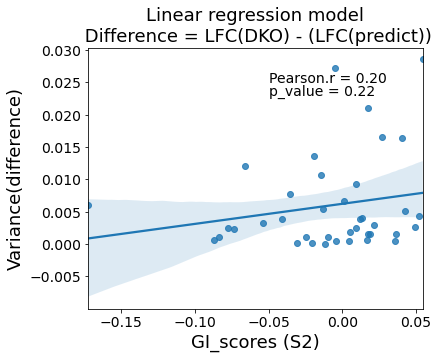

In [40]:
lfc_S2 = pd.read_csv('./sequencing/outs_S2/results/lfc_Deseq2_S2.csv',index_col=0)
lfc_S2
print(lfc_S2.shape)

#Running transcriptomic_diff for all DKOs in a parallel way
Diffs_S2 = Parallel(n_jobs=24, verbose=10)(delayed(transcriptomic_diff)(*double,LFC = lfc_S2) for double in doubles_S2)

##Save transcriptomic difference of each DKO including first_lfc, second_lfc, double_lfc, predictions, differences
for Diff in Diffs_S2:
    name = Diff['name']
    file_name = "./sequencing/outs_S2/results/prediction_and_transcriptomic_differences/diff_" + name + ".csv"
    f = pd.DataFrame(Diff)
    f['gene_name'] = pop2.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

##Scatterplot of GI scores and transcriptomic differences
diff_lm_S2 = pd.DataFrame([Diff['diff_lm'] for Diff in Diffs_S2]).T
var_lm_diff_S2 = diff_lm_S2.var(axis = 0, skipna = True)
DKOs_final_S2['transcriptomic_diff_var_lm'] = var_lm_diff_S2
plt.figure(figsize=(6,4.8))
#sns.set_style('ticks')
#sns.regplot(DKOs_info['gi_score'], DKOs_info['transcriptomic_diff_var'], ci = None)
sns.regplot(DKOs_final_S2['GI_score'], DKOs_final_S2['transcriptomic_diff_var_lm'])
dat = DKOs_final_S2.dropna()
#print(dat.shape)
print(scipy.stats.pearsonr(dat['GI_score'], dat['transcriptomic_diff_var_lm']))
plt.title('Linear regression model\n Difference = LFC(DKO) - (LFC(predict))', fontsize = 18)
plt.xlabel('GI_scores (S2)')
plt.ylabel('Variance(difference)')
plt.text(-0.05, 0.025, "Pearson.r = 0.20", fontsize = 14)
plt.text(-0.05, 0.023, "p_value = 0.22",fontsize = 14)
#plt.show()
plt.savefig('./sequencing/outs_S2/results/Transcriptomic_diff_var_linear_regression.png', dpi=300)


**------------------------------Sample 3: S3_D6_tgf (Cells in TGfbeta1 medium at Day6)-----------------------------------**

(6332, 66)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Batch computation too fast (0.1138s.) Setting batch_size=2.
[Parallel(n_jobs=24)]: Done   2 out of  33 | elapsed:    0.2s remaining:    2.4s
[Parallel(n_jobs=24)]: Done   6 out of  33 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=24)]: Done  10 out of  33 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=24)]: Done  14 out of  33 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=24)]: Done  18 out of  33 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=24)]: Done  22 out of  33 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=24)]: Done  26 out of  33 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=24)]: Done  30 out of  33 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=24)]: Done  33 out of  33 | elapsed:    0.8s finished


(0.5850961265240125, 0.0005457589094312534)


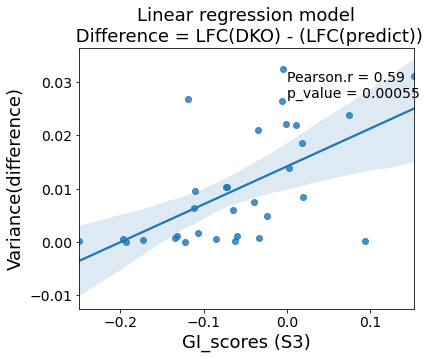

In [41]:
lfc_S3 = pd.read_csv('./sequencing/outs_S3/results/lfc_Deseq2_S3.csv',index_col=0)
lfc_S3
print(lfc_S3.shape)

#Running transcriptomic_diff for all DKOs in a parallel way
Diffs_S3 = Parallel(n_jobs=24, verbose=10)(delayed(transcriptomic_diff)(*double,LFC = lfc_S3) for double in doubles_S3)

##Save transcriptomic difference of each DKO including first_lfc, second_lfc, double_lfc, predictions, differences
for Diff in Diffs_S3:
    name = Diff['name']
    file_name = "./sequencing/outs_S3/results/prediction_and_transcriptomic_differences/diff_" + name + ".csv"
    f = pd.DataFrame(Diff)
    f['gene_name'] = pop3.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

##Scatterplot of GI scores and transcriptomic differences
diff_lm_S3 = pd.DataFrame([Diff['diff_lm'] for Diff in Diffs_S3]).T
var_lm_diff_S3 = diff_lm_S3.var(axis = 0, skipna = True)
DKOs_final_S3['transcriptomic_diff_var_lm'] = var_lm_diff_S3
plt.figure(figsize=(6,4.8))
#sns.set_style('ticks')
#sns.regplot(DKOs_info['gi_score'], DKOs_info['transcriptomic_diff_var'], ci = None)
sns.regplot(DKOs_final_S3['GI_score'], DKOs_final_S3['transcriptomic_diff_var_lm'])
dat = DKOs_final_S3.dropna()
#print(dat.shape)
print(scipy.stats.pearsonr(dat['GI_score'], dat['transcriptomic_diff_var_lm']))
plt.title('Linear regression model\n Difference = LFC(DKO) - (LFC(predict))', fontsize = 18)
plt.xlabel('GI_scores (S3)')
plt.ylabel('Variance(difference)')
plt.text(0.0, 0.030, "Pearson.r = 0.59", fontsize = 14)
plt.text(0.0, 0.027, "p_value = 0.00055",fontsize = 14)
#plt.show()
plt.savefig('./sequencing/outs_S3/results/Transcriptomic_diff_var_linear_regression.png', dpi=300)


**------------------------------Sample 4: S4_D6_min (Cells in minimal medium at Day6)-----------------------------------**

(5069, 68)


[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Batch computation too fast (0.0757s.) Setting batch_size=2.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done   7 out of  49 | elapsed:    0.2s remaining:    1.4s
[Parallel(n_jobs=24)]: Done  12 out of  49 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=24)]: Done  17 out of  49 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=24)]: Done  22 out of  49 | elapsed:    0.6s remaining:    0.7s
[Parallel(n_jobs=24)]: Done  27 out of  49 | elapsed:    0.7s remaining:    0.5s
[Parallel(n_jobs=24)]: Done  32 out of  49 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=24)]: Done  37 out of  49 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=24)]: Done  42 out of  49 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=24)]: Done  47 out of  49 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=24)]: Done  49 out of  49 | elap

(0.7061961702349178, 1.2192833122300044e-07)


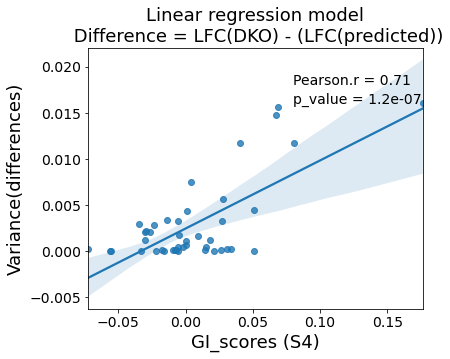

In [42]:
lfc_S4 = pd.read_csv('./sequencing/outs_S4/results/lfc_Deseq2_S4.csv',index_col=0)
lfc_S4
print(lfc_S4.shape)

#Running transcriptomic_diff for all DKOs in a parallel way
Diffs_S4 = Parallel(n_jobs=24, verbose=10)(delayed(transcriptomic_diff)(*double,LFC = lfc_S4) for double in doubles_S4)

##Save transcriptomic difference of each DKO including first_lfc, second_lfc, double_lfc, predictions, differences
for Diff in Diffs_S4:
    name = Diff['name']
    file_name = "./sequencing/outs_S4/results/prediction_and_transcriptomic_differences/diff_" + name + ".csv"
    f = pd.DataFrame(Diff)
    f['gene_name'] = pop4.gene_names(f.index.values)
    f.reset_index(inplace = True)
    f.set_index('gene_name', inplace = True)
    f.to_csv(file_name)

##Scatterplot of GI scores and transcriptomic differences
diff_lm_S4 = pd.DataFrame([Diff['diff_lm'] for Diff in Diffs_S4]).T
var_lm_diff_S4 = diff_lm_S4.var(axis = 0, skipna = True)
DKOs_final_S4['transcriptomic_diff_var_lm'] = var_lm_diff_S4
plt.figure(figsize=(6,4.8))
#sns.set_style('ticks')
#sns.regplot(DKOs_info['gi_score'], DKOs_info['transcriptomic_diff_var'], ci = None)
sns.regplot(DKOs_final_S4['GI_score'], DKOs_final_S4['transcriptomic_diff_var_lm'])
dat = DKOs_final_S4.dropna()
#print(dat.shape)
print(scipy.stats.pearsonr(dat['GI_score'], dat['transcriptomic_diff_var_lm']))
plt.title('Linear regression model\n Difference = LFC(DKO) - (LFC(predicted))', fontsize = 18)
plt.xlabel('GI_scores (S4)')
plt.ylabel('Variance(differences)')
plt.text(0.08, 0.018, "Pearson.r = 0.71", fontsize = 14)
plt.text(0.08, 0.016, "p_value = 1.2e-07",fontsize = 14)
#plt.show()
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_diff_var_linear_regression.png', dpi=300)


In [43]:
len(DKOs_final_S4['GI_score'])

49

(0.523414009733375, 0.0003162756612675666)


<AxesSubplot:xlabel='GI_score'>

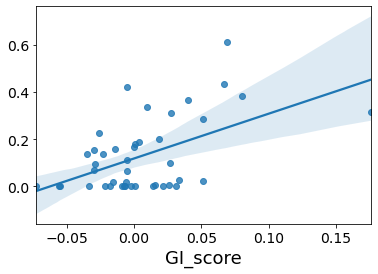

In [44]:
y = [Diff['r2'] for Diff in Diffs_S4]

DKOs_final_S4['r2'] = y
dat = DKOs_final_S4.dropna()
#print(dat.shape)
print(scipy.stats.pearsonr(dat['GI_score'], dat['r2']))
sns.regplot(DKOs_final_S4['GI_score'], y)


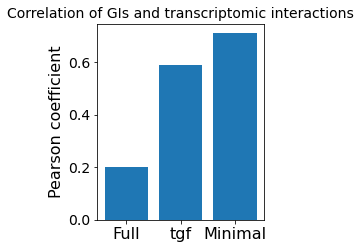

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3.6))
# Make a fake dataset:
height = [0.20, 0.59, 0.71]
bars = ('Full', 'tgf', 'Minimal')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars, fontsize = 16)
#plt.xlabel('GI_score')
plt.ylabel('Pearson coefficient', fontsize = 16)
plt.title("Correlation of GIs and transcriptomic interactions", fontsize = 14) 
# Show graphic
#plt.show()
plt.savefig('./sequencing/Correlation of GIs and transcriptomic interactionns.png', dpi=300)


### III_b. Examples of transcriptomic interactions in low_serum condition

In [46]:
DKOs_final_S2.sort_values('transcriptomic_diff_var_lm', ascending = False, inplace = True)
DKOs_final_S2.to_csv("./sequencing/outs_S2/results/correlation_GI_and_transcriptomic_interactions/Relationship_of_GI_score_and_Transcriptomic_differences_S2.csv")
DKOs_final_S2.head(10)

,perturbed,num_cells,num_targets,fitness1,fitness2,fitness,GI_score,Rep1_Max.mean,Rep1_p.adj_Max,Rep2_Max.mean,Rep2_p.adj_Max,gi.Weighted.Avg.Max,fisher.p.Max.adj,transcriptomic_diff_var_lm
NF2-USP9X,NF2-USP9X,34,2,-0.0344,-0.0522,-0.0433,nan,-0.0812,1.0000,-0.0746,1.0000,-0.0776,1.0000,0.0302
NF2-TBX3,NF2-TBX3,74,2,0.1025,0.0688,0.0857,0.0545,-0.0119,1.0000,-0.0096,1.0000,-0.0106,1.0000,0.0285
NF1-NF2,NF1-NF2,50,2,0.0230,0.0273,0.0252,-0.0047,-0.0070,1.0000,0.0010,1.0000,-0.0025,1.0000,0.0271
NF2-TP53,NF2-TP53,267,2,0.0473,0.0471,0.0472,0.0173,0.0013,1.0000,0.0088,0.0073,0.0054,0.0249,0.0210
NF2-PTEN,NF2-PTEN,64,2,0.1076,0.0998,0.1037,0.0272,0.0039,1.0000,0.0037,1.0000,0.0038,1.0000,0.0166
SMAD4-TP53,SMAD4-TP53,240,2,0.0641,0.0812,0.0726,0.0403,-0.0018,1.0000,0.0016,1.0000,-0.0001,1.0000,0.0164
NF2-RB1,NF2-RB1,93,2,0.0188,0.0289,0.0238,-0.0192,-0.0115,1.0000,-0.0031,1.0000,-0.0073,1.0000,0.0137
CBFB-NF2,CBFB-NF2,60,2,-0.0117,-0.0603,-0.0360,-0.0659,-0.0472,1.0000,-0.0416,1.0000,-0.0448,1.0000,0.0121
PTEN-SMAD4,PTEN-SMAD4,124,2,0.0608,0.0638,0.0623,-0.0142,0.0064,1.0000,0.0080,1.0000,0.0073,0.6801,0.0106
NF2-SMAD4,NF2-SMAD4,159,2,0.0753,0.0085,0.0419,0.0096,-0.0212,1.0000,-0.0154,1.0000,-0.0182,1.0000,0.0092


In [47]:
DKOs_final_S3.sort_values('transcriptomic_diff_var_lm', ascending = False, inplace = True)
DKOs_final_S3.to_csv("./sequencing/outs_S3/results/correlation_GI_and_transcriptomic_interactions/Relationship_of_GI_score_and_Transcriptomic_differences_S3.csv")
DKOs_final_S3.head(10)

,perturbed,num_cells,num_targets,fitness1,fitness2,fitness,GI_score,Rep1_Max.mean,Rep1_p.adj_Max,Rep2_Max.mean,Rep2_p.adj_Max,gi.Weighted.Avg.Max,fisher.p.Max.adj,transcriptomic_diff_var_lm
NF2-SMAD4,NF2-SMAD4,213,2,0.2193,0.3039,0.2616,-0.0045,-0.0453,1.0000,-0.0307,1,-0.0367,1.0000,0.0324
CBFB-NF2,CBFB-NF2,43,2,0.1675,0.1167,0.1421,0.1522,0.0329,1.0000,-0.0354,1,-0.0077,1.0000,0.0312
SMAD4-USP9X,SMAD4-USP9X,58,2,0.1088,0.1357,0.1223,nan,-0.0993,1.0000,-0.1218,1,-0.1130,1.0000,0.0304
CBFB-SMAD4,CBFB-SMAD4,142,2,0.1250,0.1699,0.1474,-0.1186,-0.1401,1.0000,-0.1414,1,-0.1409,1.0000,0.0269
CASP8-SMAD4,CASP8-SMAD4,116,2,0.2648,0.2542,0.2595,-0.0065,-0.0400,1.0000,-0.0647,1,-0.0540,1.0000,0.0264
PTEN-SMAD4,PTEN-SMAD4,161,2,0.3478,0.3318,0.3398,0.0738,0.0251,1.0000,0.0150,1,0.0190,1.0000,0.0239
SMAD4-TP53,SMAD4-TP53,298,2,0.2742,0.2550,0.2646,-0.0014,-0.0101,1.0000,0.0020,1,-0.0033,1.0000,0.0220
SMAD4-TBX3,SMAD4-TBX3,165,2,0.3074,0.2453,0.2764,0.0104,0.0192,1.0000,-0.0139,1,-0.0012,1.0000,0.0219
NF1-SMAD4,NF1-SMAD4,97,2,0.2411,0.2212,0.2312,-0.0348,-0.0285,1.0000,-0.0636,1,-0.0467,1.0000,0.0210
RB1-SMAD4,RB1-SMAD4,254,2,0.2959,0.2729,0.2844,0.0184,-0.0304,1.0000,-0.0606,1,-0.0494,1.0000,0.0186


In [48]:
DKOs_final_S4.sort_values('transcriptomic_diff_var_lm', ascending = False, inplace = True)
DKOs_final_S4.to_csv("./sequencing/outs_S4/results/correlation_GI_and_transcriptomic_interactions/Relationship_of_GI_score_and_Transcriptomic_differences_S4.csv")
DKOs_final_S4.head(10)

,perturbed,num_cells,num_targets,fitness1,fitness2,fitness,GI_score,Rep1_Max.mean,Rep1_p.adj_Max,Rep2_Max.mean,Rep2_p.adj_Max,gi.Weighted.Avg.Max,fisher.p.Max.adj,transcriptomic_diff_var_lm,r2
NF2-PTEN,NF2-PTEN,65,2,0.3752,0.3873,0.3813,0.1764,0.0810,0.0000,0.0925,0.0000,0.0862,0.0000,0.0161,0.3147
NF2-TP53,NF2-TP53,271,2,0.2675,0.2800,0.2738,0.0690,0.0458,0.0000,0.0551,0.0000,0.0501,0.0000,0.0157,0.6143
NF2-TBX3,NF2-TBX3,82,2,0.3000,0.2437,0.2718,0.0670,-0.0010,1.0000,0.0001,1.0000,-0.0004,1.0000,0.0148,0.4358
PTEN-TP53,PTEN-TP53,148,2,0.2648,0.2565,0.2607,0.0804,0.0782,0.0000,0.0717,0.0000,0.0747,0.0000,0.0117,0.3849
NF2-RB1,NF2-RB1,90,2,0.2410,0.2492,0.2451,0.0402,0.0050,1.0000,0.0154,0.0389,0.0101,0.0519,0.0117,0.3670
NF1-NF2,NF1-NF2,56,2,0.2057,0.2113,0.2085,0.0037,-0.0038,1.0000,0.0057,1.0000,0.0001,1.0000,0.0074,0.1893
PTEN-SMAD4,PTEN-SMAD4,145,2,0.2113,0.2044,0.2078,0.0276,0.0332,0.0052,0.0316,0.0028,0.0321,0.0000,0.0057,0.3098
PTEN-USP9X,PTEN-USP9X,22,2,0.0500,0.0502,0.0501,nan,-0.0986,1.0000,-0.0991,1.0000,-0.0988,1.0000,0.0055,0.1043
NF2-SMAD4,NF2-SMAD4,128,2,0.2679,0.2437,0.2558,0.0510,0.0121,0.6638,0.0238,0.0000,0.0185,0.0000,0.0044,0.2857
CBFB-PTEN,CBFB-PTEN,56,2,0.1928,0.1693,0.1810,0.0008,-0.0090,1.0000,-0.0206,1.0000,-0.0166,1.0000,0.0044,0.1791


   **Examples:**
   
**Top 3 gene pairs with highest transcriptomic interactions and GI score (and GI score in CRISPR screening):**
    
**NF2-PTEN, NF2-TP53, PTEN-TP53**

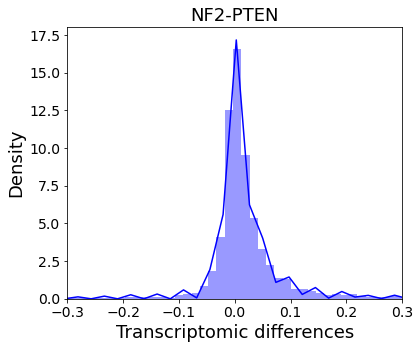

In [49]:
#NF2-PTEN
plt.figure(figsize=(6,5))
sns.distplot(diff_lm_S4['NF2-PTEN'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
plt.title('NF2-PTEN',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/NF2_PTEN.png', dpi=300)


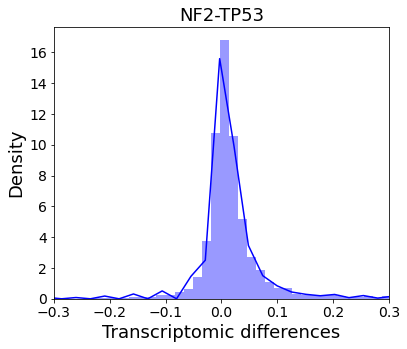

In [50]:
#NF2-TP53
plt.figure(figsize=(6,5))
sns.distplot(diff_lm_S4['NF2-TP53'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
#plt.ylim(0, 20)
plt.title('NF2-TP53',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/NF2_TP53.png', dpi=300)


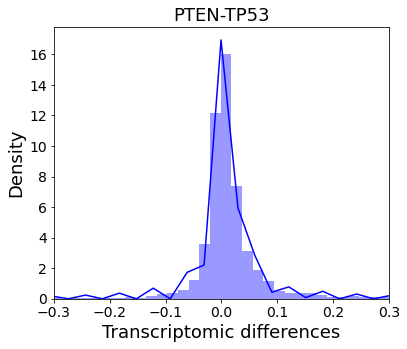

In [51]:
#PTEN-TP53
plt.figure(figsize=(6,5))
sns.distplot(diff_lm_S4['PTEN-TP53'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
#plt.ylim(0, 15)
plt.title('PTEN-TP53',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/PTEN_TP53.png', dpi=300)


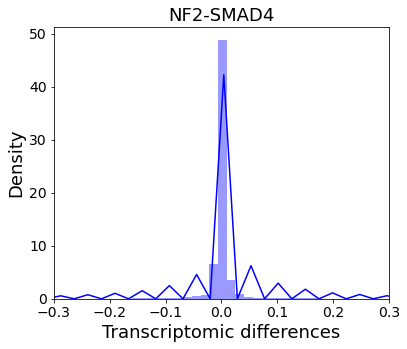

In [52]:
#NF2-SMAD4
plt.figure(figsize=(6,5))
sns.distplot(diff_lm_S4['NF2-SMAD4'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
plt.title('NF2-SMAD4',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/NF2_SMAD4.png', dpi=300)


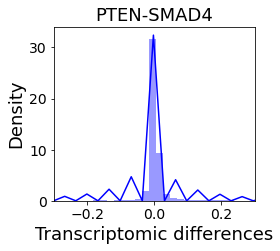

In [53]:
#PTEN-SMAD4
plt.figure(figsize=(3.6,3.2))
sns.distplot(diff_lm_S4['PTEN-SMAD4'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
plt.title('PTEN-SMAD4',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/PTEN_SMAD4.png', dpi=300)

**Transcriptomic interactions from random gene pairs**:

In [54]:
#list of DKOs
print(DKOs_S4)

['CASP8-CDH1', 'CASP8-NF1', 'CASP8-NF2', 'CASP8-PTEN', 'CASP8-RB1', 'CASP8-SMAD4', 'CASP8-TBX3', 'CASP8-TP53', 'CBFB-CDH1', 'CBFB-NF1', 'CBFB-NF2', 'CBFB-PTEN', 'CBFB-RB1', 'CBFB-SMAD4', 'CBFB-TBX3', 'CBFB-TP53', 'CBFB-USP9X', 'CDH1-NF1', 'CDH1-NF2', 'CDH1-PTEN', 'CDH1-RB1', 'CDH1-SMAD4', 'CDH1-TBX3', 'CDH1-TP53', 'NF1-NF2', 'NF1-PTEN', 'NF1-RB1', 'NF1-SMAD4', 'NF1-TBX3', 'NF1-TP53', 'NF2-PTEN', 'NF2-RB1', 'NF2-SMAD4', 'NF2-TBX3', 'NF2-TP53', 'NF2-USP9X', 'PTEN-RB1', 'PTEN-SMAD4', 'PTEN-TBX3', 'PTEN-TP53', 'PTEN-USP9X', 'RB1-SMAD4', 'RB1-TBX3', 'RB1-TP53', 'SMAD4-TBX3', 'SMAD4-TP53', 'SMAD4-USP9X', 'TBX3-TP53', 'TP53-USP9X']


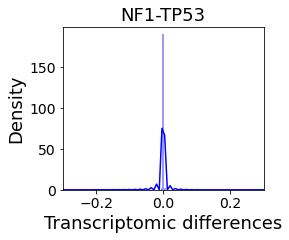

In [55]:
#Random cotrol gene pair: NF1-TP53
plt.figure(figsize=(3.6,3))
sns.distplot(diff_lm_S4['NF1-TP53'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
#plt.ylim(0, 15)
plt.title('NF1-TP53',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/NF1_TP53.png', dpi=300)


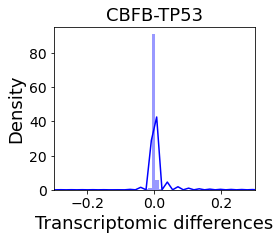

In [56]:
#Random cotrol gene pair: CBFB-TP53
plt.figure(figsize=(3.6,3))
sns.distplot(diff_lm_S4['CBFB-TP53'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
#plt.ylim(0, 15)
plt.title('CBFB-TP53',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/CBFB_TP53.png', dpi=300)


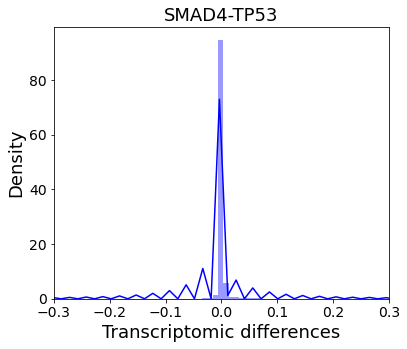

In [57]:
#Random cotrol gene pair: SMAD4-TP53
plt.figure(figsize=(6,5))
sns.distplot(diff_lm_S4['SMAD4-TP53'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
#plt.ylim(0, 15)
plt.title('SMAD4-TP53',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/SMAD4-TP53.png', dpi=300)


Over!

In [ ]:
#Random cotrol gene pair: NF1-TP53
plt.figure(figsize=(6,5))
sns.distplot(diff_lm_S4['NF2-SMAD4'], bins=int(200),hist=True, kde=True, color = 'blue')
plt.xlim(-0.3, 0.3)
#plt.ylim(0, 15)
plt.title('NF2-SMAD4',fontsize = 18)
plt.xlabel('Transcriptomic differences')
plt.ylabel('Density')
plt.savefig('./sequencing/outs_S4/results/Transcriptomic_difference/NF2-SMAD4.png', dpi=300)
